# Obesity Levels Research Project
## AAI 500 - Fall 2024

### Researchers

    Bosky Atani
    Dean P. Simmer

In [835]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load the data file
obesity_file_path = "data/ObesityDataSet_raw_and_data_sinthetic.csv"
obesity = pd.read_csv(obesity_file_path , sep=",")
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [836]:
obesity = obesity.rename(columns={"CALC":"alcohol_drinking_frequency",
            "FAVC":"high_calorie_food_eat",
            "FCVC":"vegetable_eat_daily",
            "NCP":"number_of_meals_daily",
            "SCC":"calories_monitoring",
            "CH2O":"water_drinking_daily",
            "FAF":"physical_activity_daily",
            "TUE":"electronics_usage_daily",
            "CAEC":"food_between_meals",
            "MTRANS":"method_of_transport"})

In [837]:
# add BMI to dataset
obesity['BMI'] = obesity['Weight'] / (obesity['Height'] ** 2)

In [838]:

obesity.describe().round(2)

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily,BMI
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66,29.70
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61,8.01
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00,13.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00,24.33
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63,28.72
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00,36.02
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00,50.81


Sample size is 2111
Mean age is 24.21 and median at 22.78.
The population dataset is mostly younger individuals
Mean weight is 86.59kg, std of 27.19.
Mean height is 1.70meters

In [839]:
# Check for any null values in the DataFrame
print(obesity.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
high_calorie_food_eat             0
vegetable_eat_daily               0
number_of_meals_daily             0
food_between_meals                0
SMOKE                             0
water_drinking_daily              0
calories_monitoring               0
physical_activity_daily           0
electronics_usage_daily           0
alcohol_drinking_frequency        0
method_of_transport               0
NObeyesdad                        0
BMI                               0
dtype: int64


In [840]:
# Check for duplicate rows
duplicates = obesity.duplicated()

# Show how many duplicate rows are there
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 24


In [841]:
# not many duplicates, drop them
obesity.drop_duplicates(inplace=True)

In [842]:
# Create a dictionary with obesity categories and corresponding ranges to understand how NObesity is computed
obesity_data = {
    'Category': ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
    'BMI Range': ['Less than 18.5', '18.5 to 24.9', '25.0 to 29.9', '30.0 to 34.9', '35.0 to 39.9', 'Higher than 40']
}

# Convert dictionary to DataFrame
obesity_table = pd.DataFrame(obesity_data)

# Display the table
print(obesity_table)

      Category       BMI Range
0  Underweight  Less than 18.5
1       Normal    18.5 to 24.9
2   Overweight    25.0 to 29.9
3    Obesity I    30.0 to 34.9
4   Obesity II    35.0 to 39.9
5  Obesity III  Higher than 40


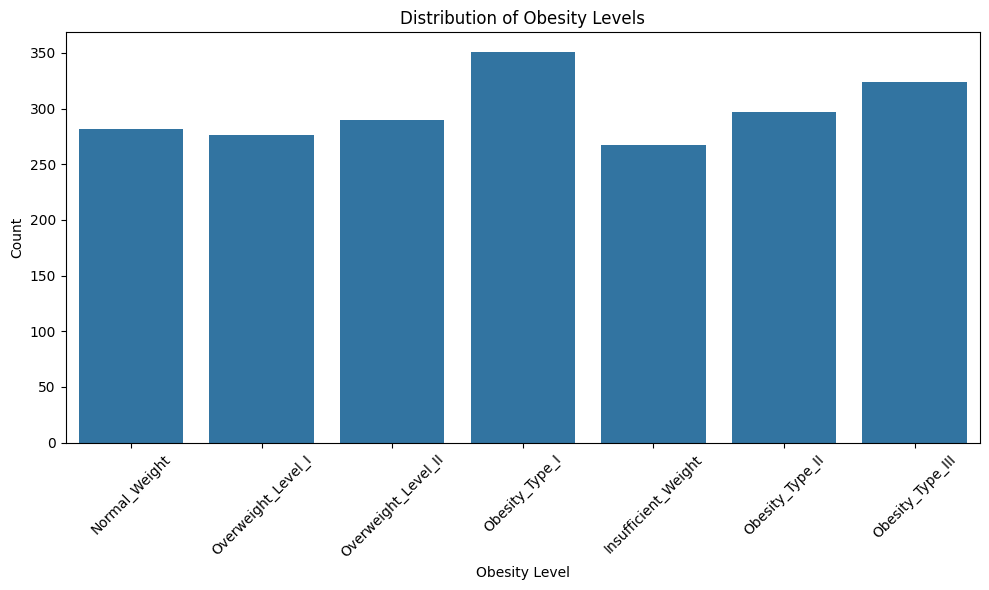

In [843]:
# Plot the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=obesity)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Balanced distribution of obesity level. (Important to validate: Since there is signifcant part of the dataset that is synthetic)

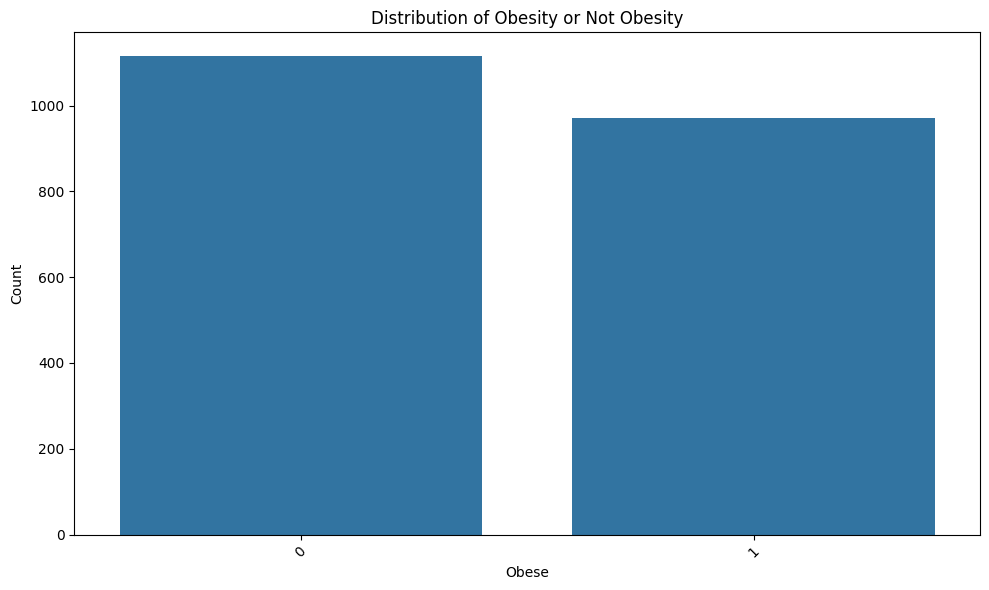

In [844]:
# add obese vs not obese variable
obesity['Obese'] = obesity['NObeyesdad'].apply(lambda x: 1 if x in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] else 0)

# plot distribution of obese/vs not obese to see if it is balanced
# Plot the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Obese', data=obesity)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Distribution of Obesity or Not Obesity')
plt.xlabel('Obese')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Univariate Analysis

**Understand distribution of categorical variables**

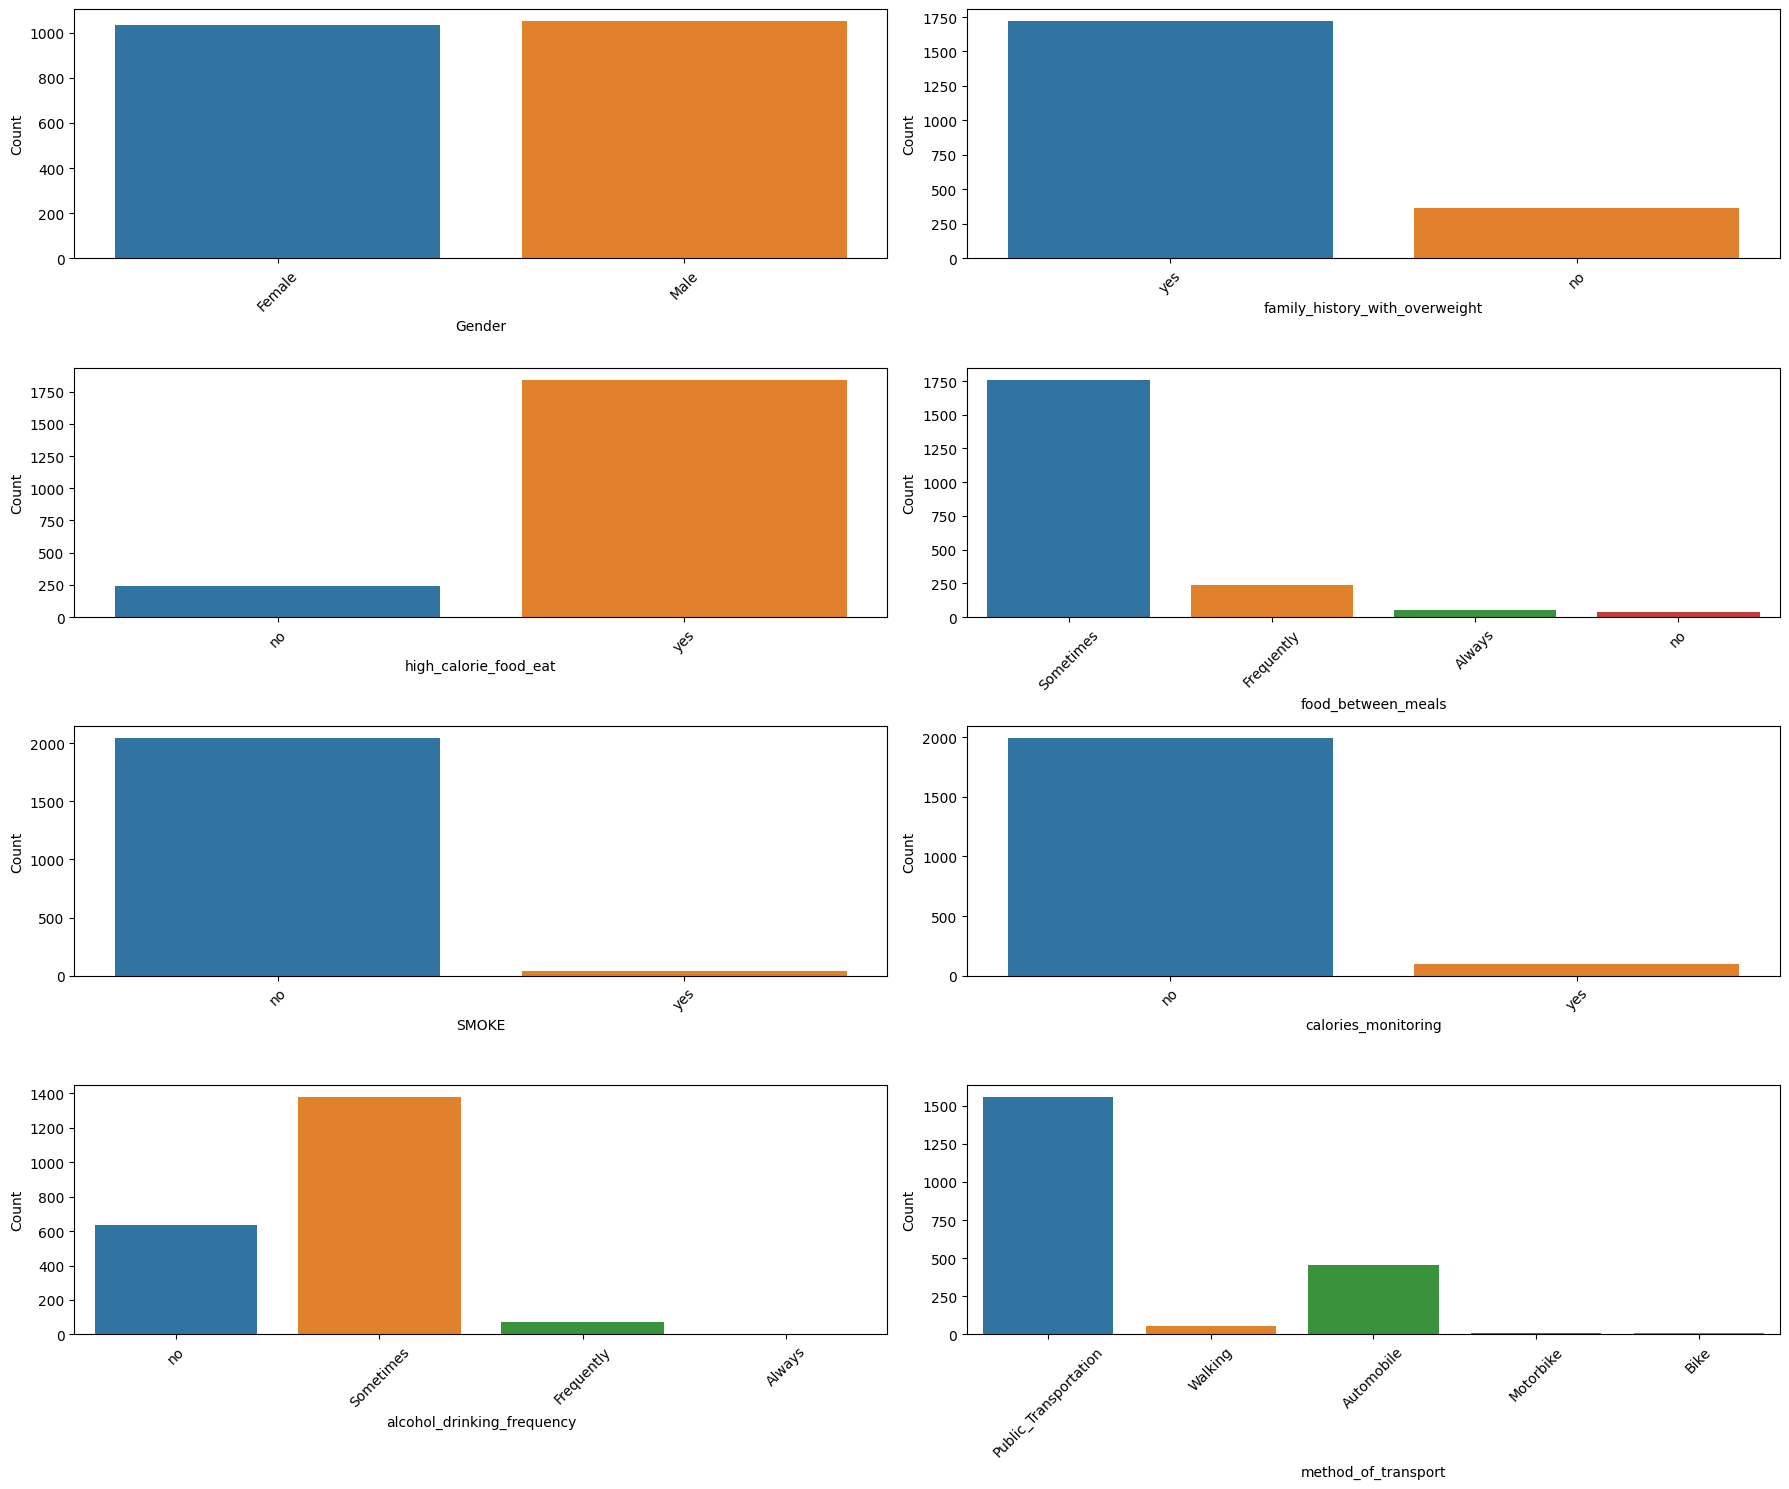

In [845]:
# Set the size of the figure
plt.figure(figsize=(18, 15))

# Loop through categorical columns (excluding the last one)
for i, col in enumerate(obesity.select_dtypes(include="object").columns[:-1]):
    plt.subplot(4, 2, i + 1)  # Create a subplot
    sns.countplot(data=obesity, x=col, hue=col, legend=False)  # Set hue to the same column    plt.title(f'Count of {col}')  # Add title for each subplot
    plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Key Observations:
* Gender: Data shows equal distribution of male vs female
* Alcohol Drinking frequency: Higher number of people drinking sometimes
* Calorie counting: Mostly not calorie counting
* Smoke: Mostly non smokers
* food between meals: many in sometimes category
* high calorie food eat: a high frequency of yes
* family history with overweight: high frequency of yes
* Method of transportation: Very high use of public transportation followed by automobile with barely any folks using other forms for transportation


**Understanding distributions and outliers for numerical features**

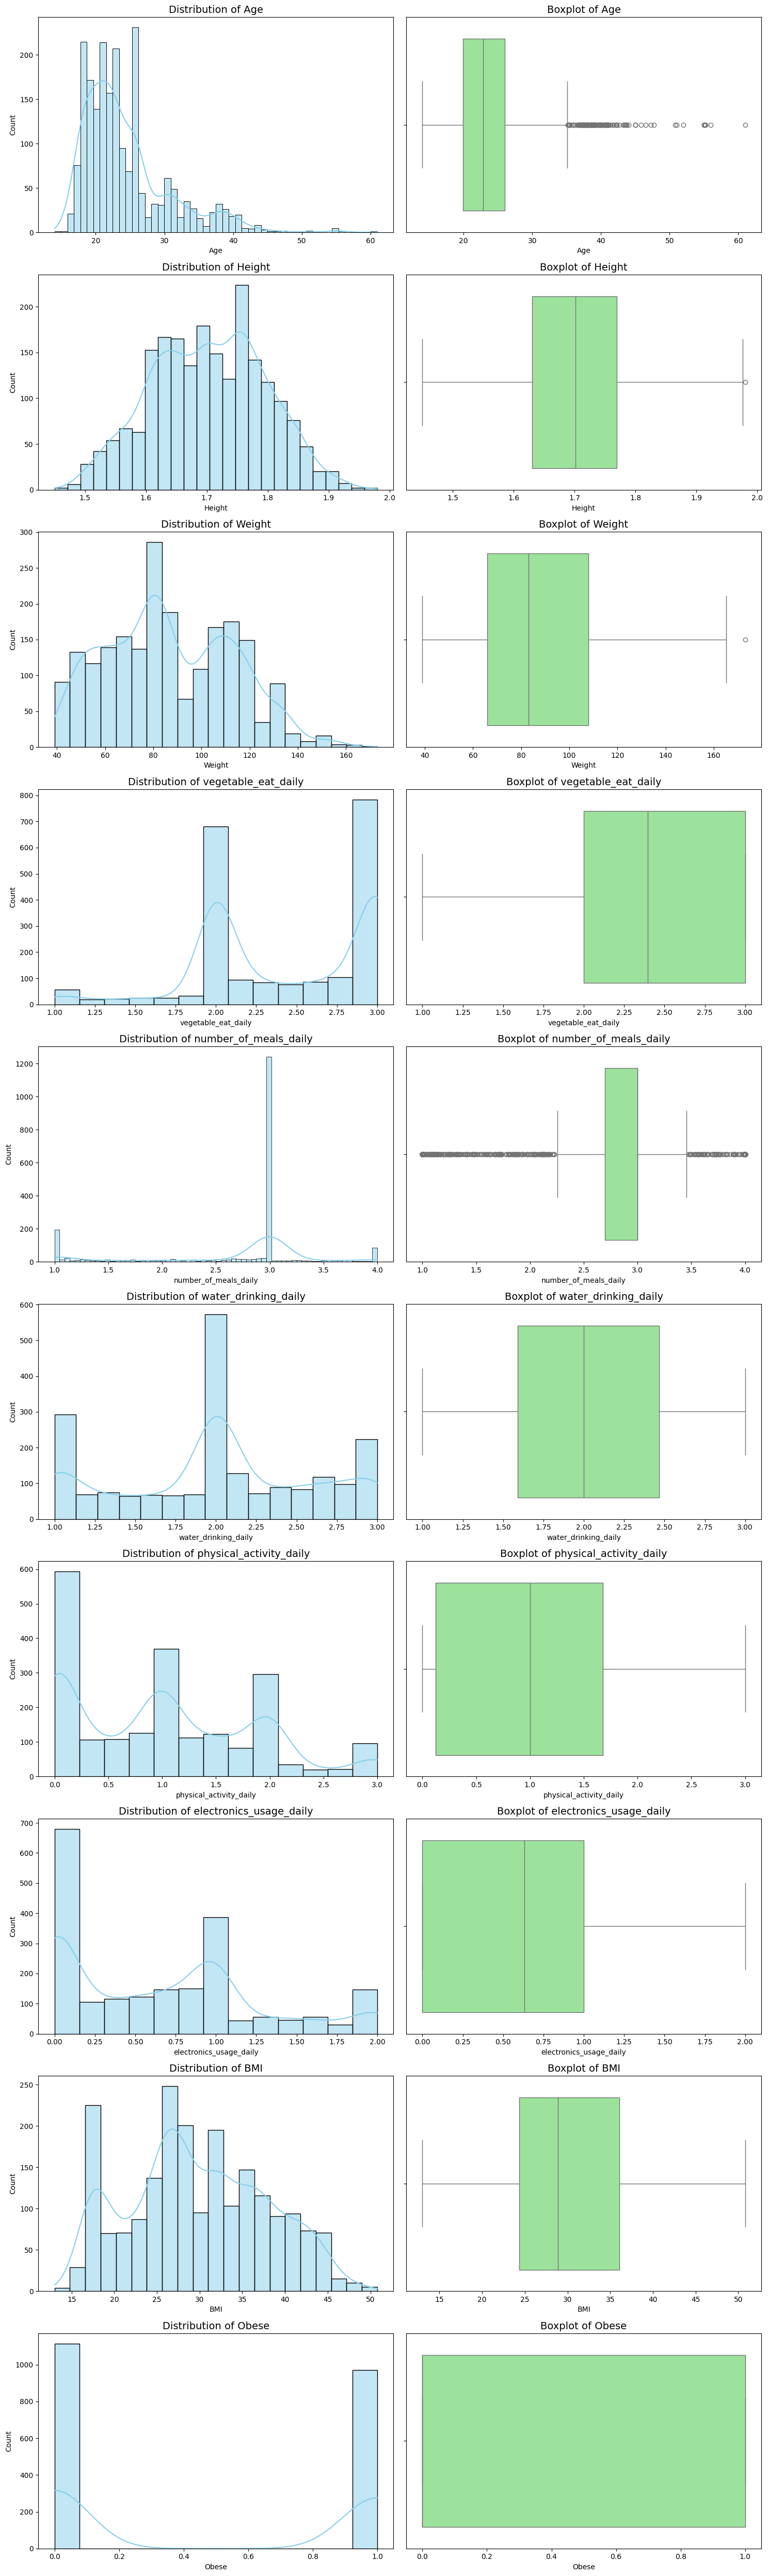

In [846]:
# Select only numerical columns from the DataFrame
numerical_cols = obesity.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure size based on the number of numerical variables
plt.figure(figsize=(15, len(numerical_cols) * 5))

def histplot_with_boxplot(col, total_cols_length, i):
    plt.subplot(total_cols_length, 2, 2 * i + 1)
    sns.histplot(obesity[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    
    # Boxplot
    plt.subplot(total_cols_length, 2, 2 * i + 2)
    sns.boxplot(x=obesity[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=14)

# Loop through each numerical column
for i, col in enumerate(numerical_cols):
    histplot_with_boxplot(col, len(numerical_cols), i)

plt.tight_layout()
plt.show()

Key observations:
- Age distribution is right skewed with many outliers. Can be capped to 99th percentile
- Many outliers and long tails for number of vegetables daily. Looks like a float variable, with values like 2.3456, probably an artificat of synthetic generation. Collapse down to half meals. 
- Daily electronics usage has high frequency for 0 usage
- Vegetable: most people are eating between 2-3 vegetables daily
- Number of Meals: most people eating around 3 meals daily
- Water: Most people are drinking between 1.5 and 2.5 L water daily
- Physical activity: Most people are engaging in physical activity 0 - 1.5 days (assume weekly)


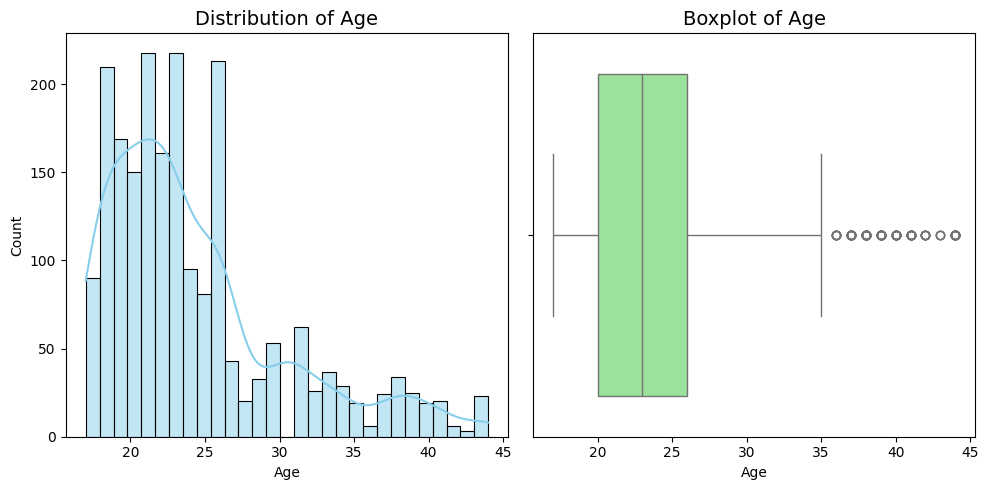

In [847]:
# Cap the Age variable to its 1st and 99th percentiles
lower_bound = obesity['Age'].quantile(0.01)
upper_bound = obesity['Age'].quantile(0.99)

# Apply the caps
obesity['Age'] = obesity['Age'].clip(lower=lower_bound, upper=upper_bound).round()

plt.figure(figsize=(10, 5))
histplot_with_boxplot('Age', 1, 0)
plt.tight_layout()
plt.show()

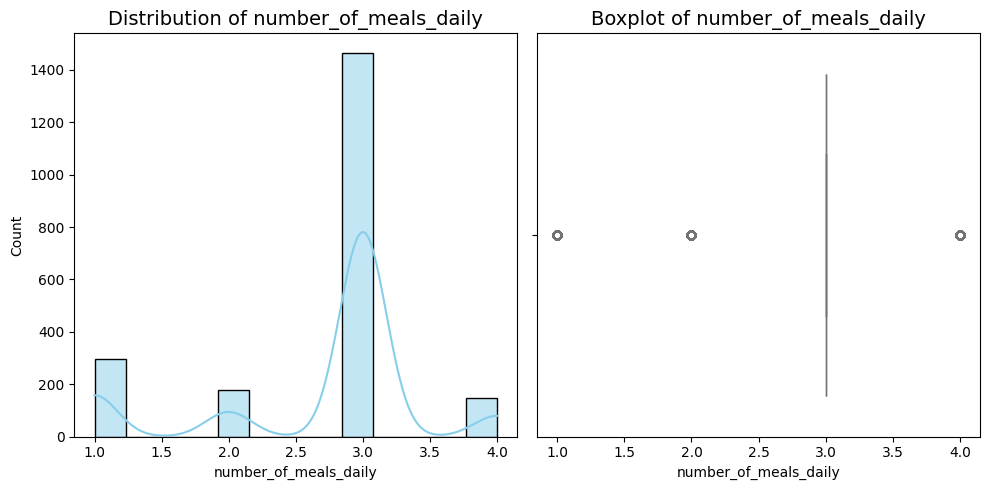

In [848]:
# number of meals has many fractional values, rounding to whole meals
col = 'number_of_meals_daily'
obesity[col] = obesity[col].round() 
plt.figure(figsize=(10, 5))
histplot_with_boxplot('number_of_meals_daily', 1, 0)
plt.tight_layout()
plt.show()

### Mutlivariate Analysis

**Understanding obesity levels by age and gender**

Do age and gender need to be considered in the model? 

<Figure size 1000x600 with 0 Axes>

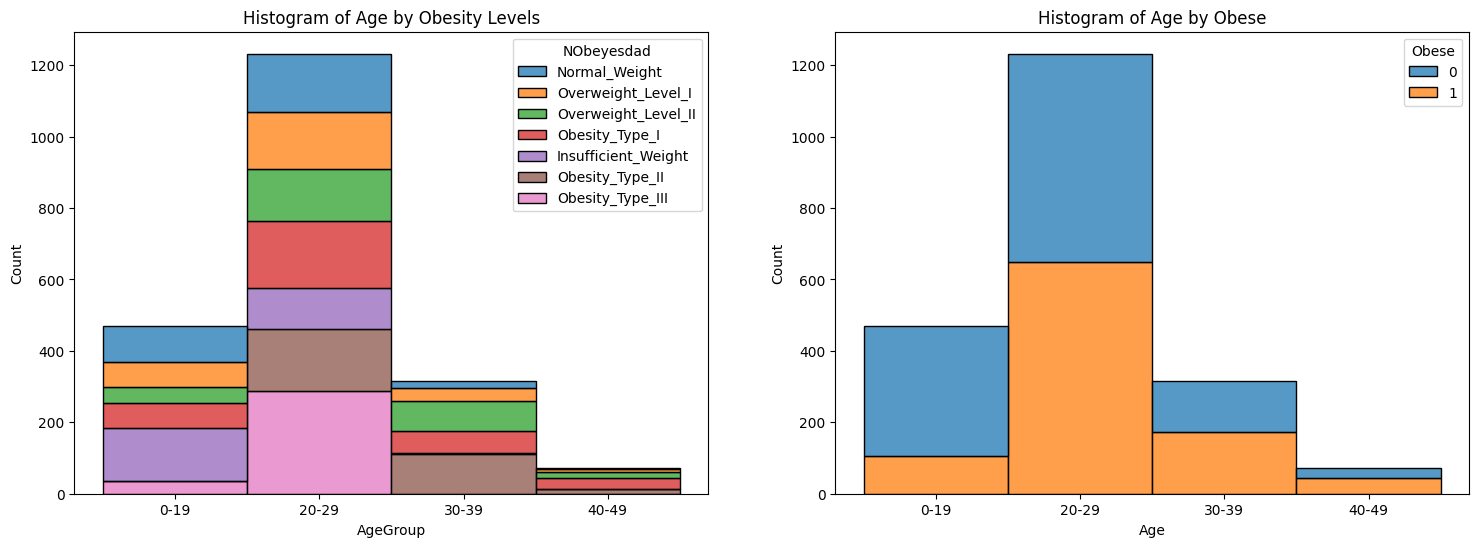

In [849]:
plt.figure(figsize=(10, 6))
# Create age groups (bins)
bins = [0, 20, 30, 40, 50]
labels = ['0-19', '20-29', '30-39', '40-49']
obesity['AgeGroup'] = pd.cut(obesity['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=obesity, x='AgeGroup', hue='NObeyesdad', multiple='stack', kde=False)
plt.title('Histogram of Age by Obesity Levels')

plt.subplot(1, 2, 2)
sns.histplot(data=obesity, x='AgeGroup', hue='Obese', multiple='stack', kde=False)
plt.title('Histogram of Age by Obese')

# Add labels and title for histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [850]:
# test if weight varies significantly betwen different age groups
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform one-way ANOVA for AgeGroups
age_group_anova = stats.f_oneway(*[obesity[obesity['AgeGroup'] == group]['Weight'] for group in obesity['AgeGroup'].unique()])

print('One-Way ANOVA for AgeGroups and Weight')
print(f'F-statistic: {age_group_anova.statistic:.4f}')
print(f'P-value: {age_group_anova.pvalue:.4f}')

# Step 3: Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=obesity['Weight'], groups=obesity['AgeGroup'], alpha=0.05)

# Step 4: Print the summary of Tukey's HSD test
print(tukey)

One-Way ANOVA for AgeGroups and Weight
F-statistic: 68.8365
P-value: 0.0000
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  0-19  20-29  18.1626    0.0  14.6751 21.6501   True
  0-19  30-39  21.1547    0.0  16.4723 25.8372   True
  0-19  40-49  14.4095    0.0   6.2242 22.5949   True
 20-29  30-39   2.9921 0.2302  -1.0661  7.0504  False
 20-29  40-49  -3.7531 0.6078 -11.5981  4.0919  False
 30-39  40-49  -6.7452 0.1689 -15.1895  1.6991  False
-----------------------------------------------------


In [851]:
male_weight = obesity[obesity['Gender'] == 'Male']['Weight']
female_weight = obesity[obesity['Gender'] == 'Female']['Weight']

t_stat, p_value = stats.ttest_ind(male_weight, female_weight, equal_var=False) 

print('Independent T-Test for Gender and Weight:')
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

Independent T-Test for Gender and Weight:
T-statistic: 7.5327
P-value: 0.0000


Age: Doing one-way anova analysis on Age results in statistically significant test, leading to reject the null hypothesis. This means there is statistically significant difference in mean weight across different age groups. Doing a TuKey test shows 0-19 year olds have significantly different weights compared to older age groups.

Gender: Doing a t-test, results in statistically significant test, leading to reject the null hypothesis. There is statistically significant difference in mean weight across different gender.

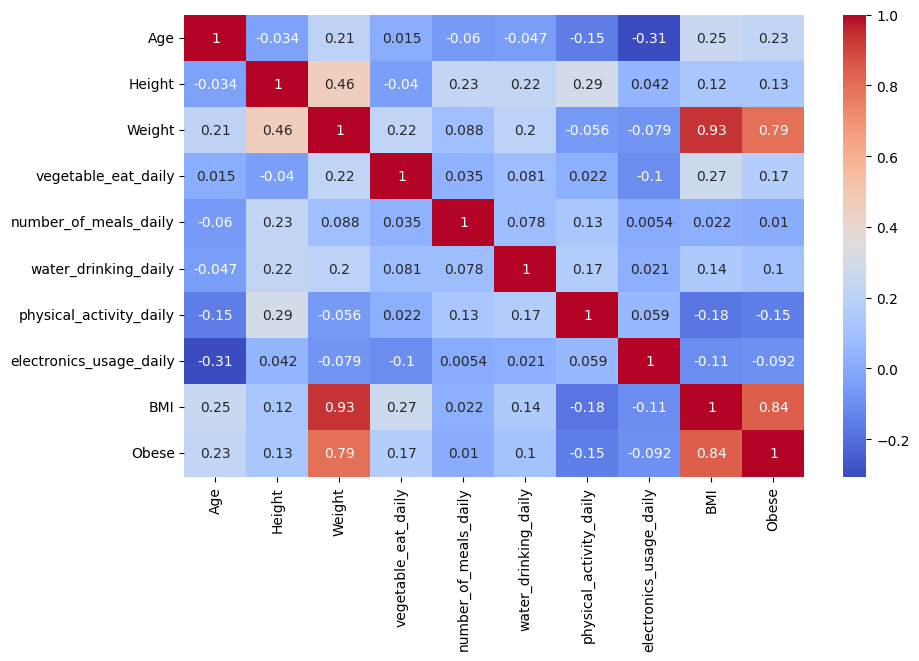

In [852]:
# explore any relationships between numeric types
# Select only the numeric columns from the dataset
numeric_data = obesity.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


 Weight, and height show some correlation. Weight, Obese, BMI show high correlation as they are functions of each other. Other corelation coffecients are small - indicating most variables are indepenant.This is important because it indicates no Multicollinearity, reducing noise for our model. 

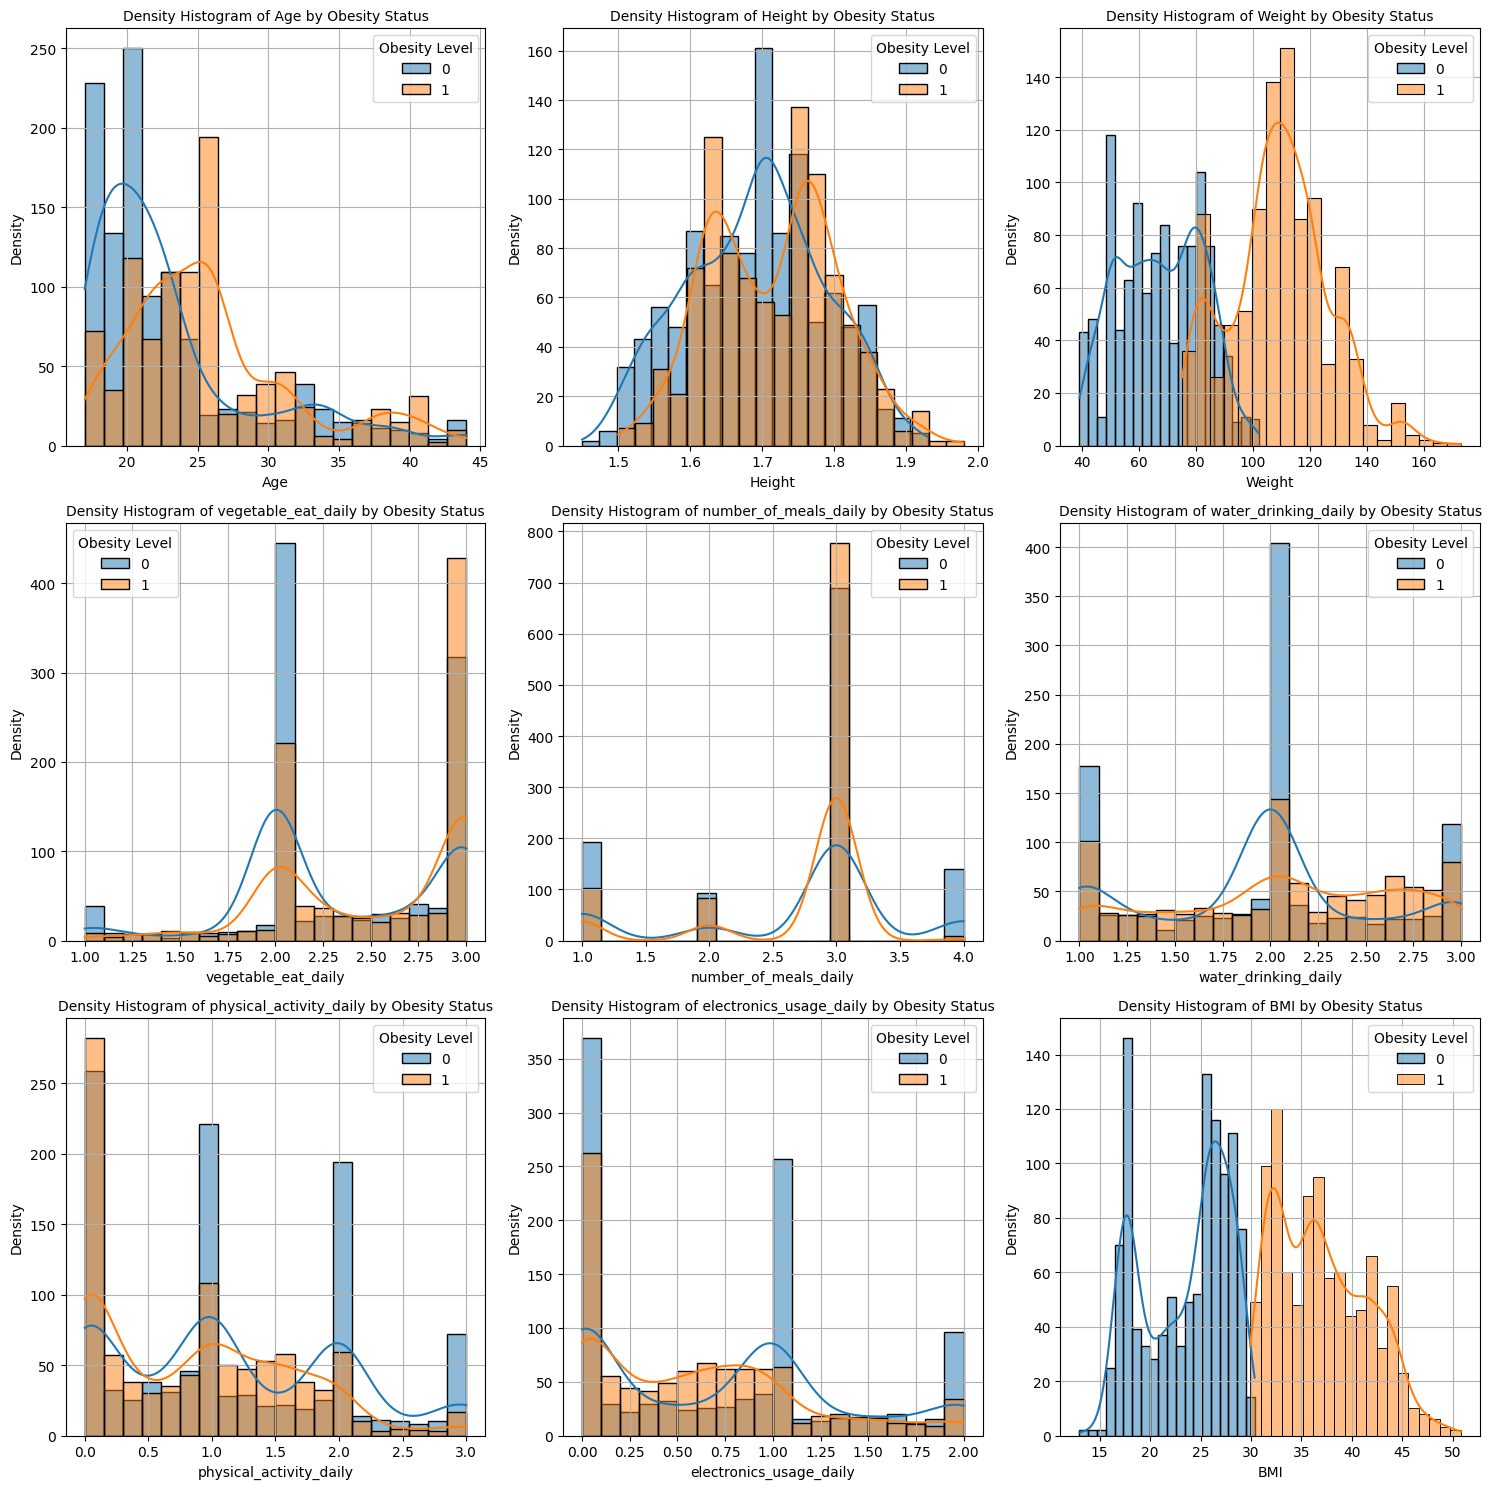

In [853]:
# Create density plots
# Select only numerical columns from the DataFrame
numerical_cols = obesity.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if 'Obese' not in col]

num_plots = len(numerical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * num_rows))


# Loop through each numerical variable and create density plots
for i, var in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    for obesity_level in obesity['Obese'].unique():  # Loop through each obesity level
        subset = obesity[obesity['Obese'] == obesity_level]
        sns.histplot(subset[var], bins=20, kde=True, label=obesity_level, alpha=0.5)  # kde=True adds a Kernel Density Estimate
    #sns.kdeplot(data=obesity, x=var, hue='NObeyesdad', fill=True, common_norm=False, palette="crest", alpha=0.5)
    plt.title(f'Density Histogram of {var} by Obesity Status', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend(title='Obesity Level')  

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()


Key Insights
- Obese individuals have significantly higher weight. This makes sense as Obesity status is a function of BMI which is a function of weight
- Higher physical activity groups of people have lower proportion of obesity 
- Water consumption peaks around 2 liters for both obese and non-obese individuals. This finding indicates a common hydration level among different obesity status groups, suggesting that water intake may not significantly vary based on weight classification.
- Despite a higher prevalence of vegetable consumption among individuals, a significant number of obese individuals still exist within this group

3


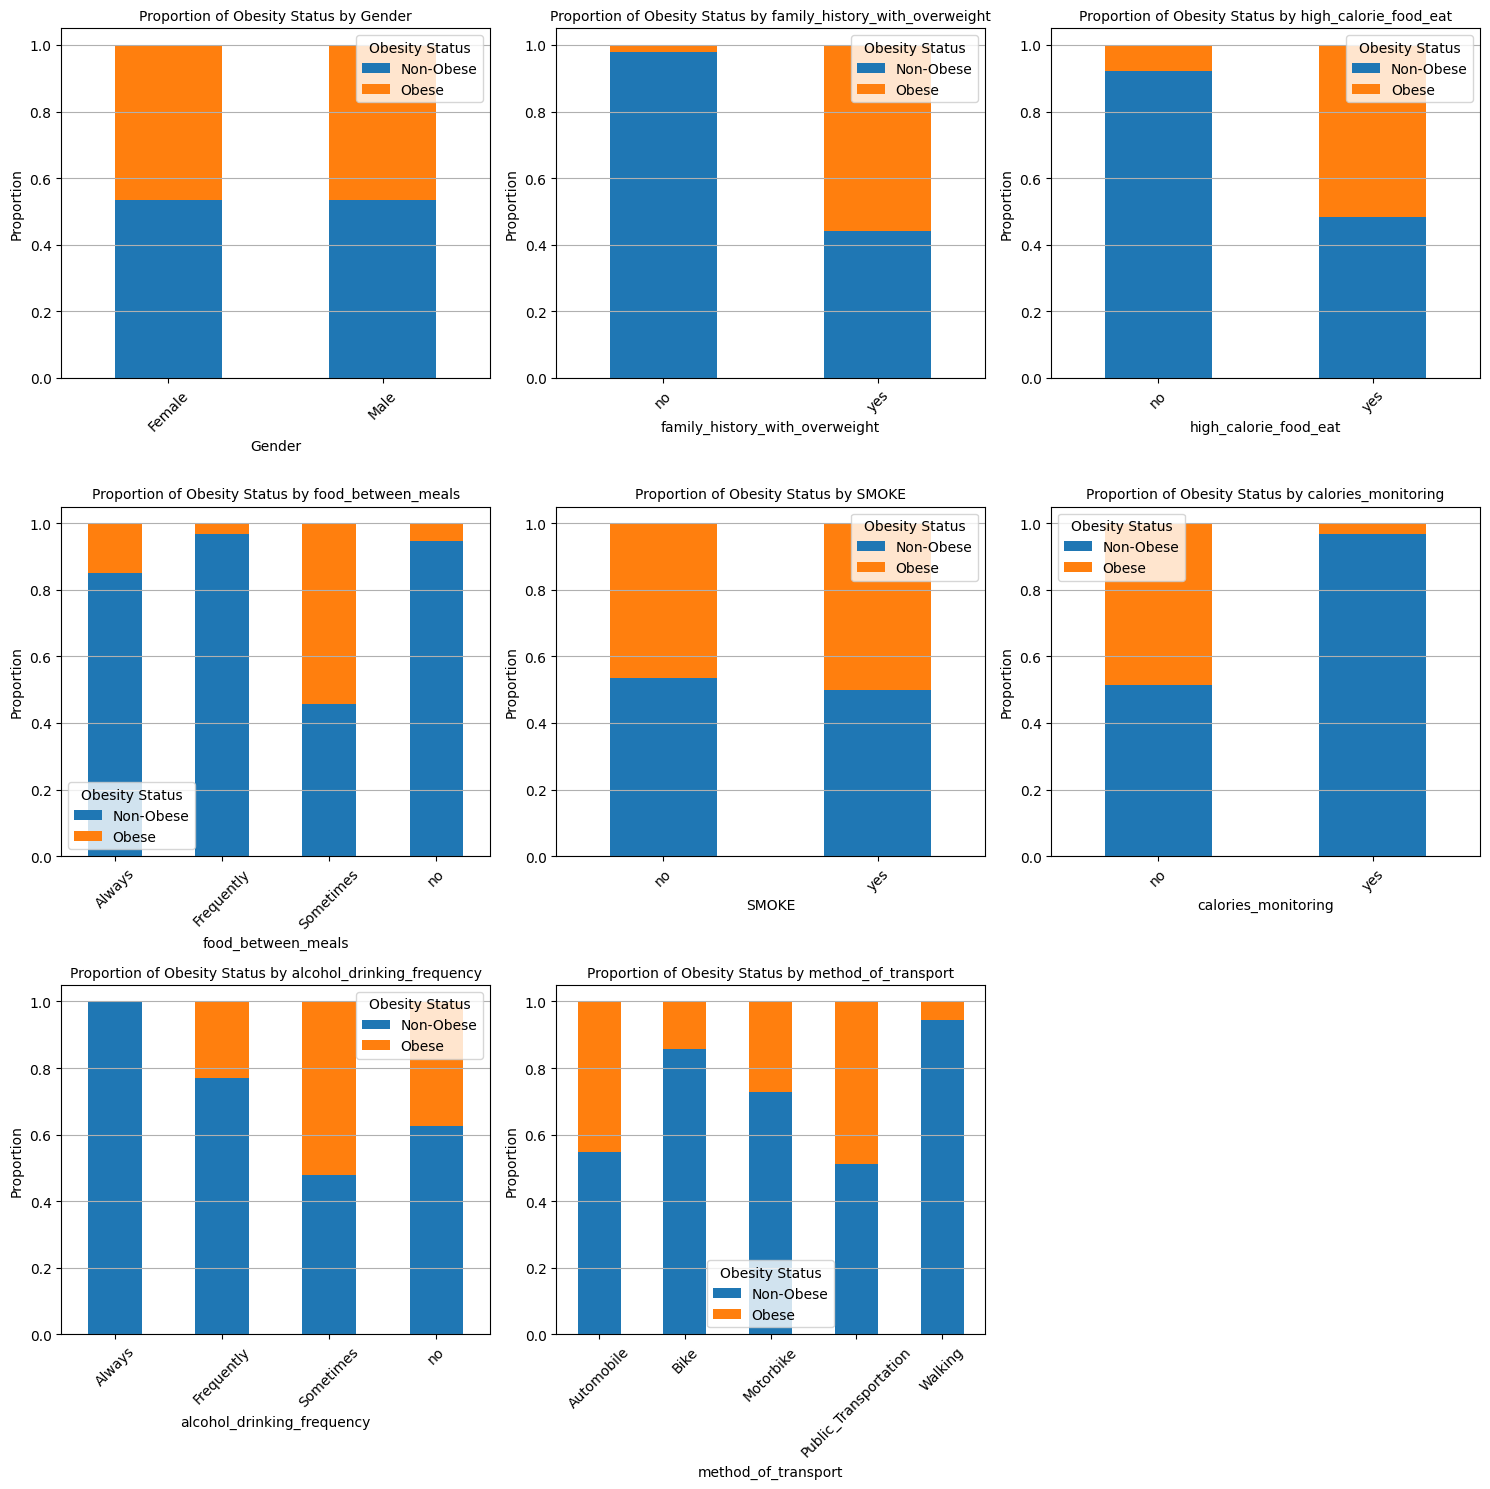

In [854]:
categorical_vars = obesity.select_dtypes(include="object").columns[:-1]

# Set up the matplotlib figure
num_vars = len(categorical_vars)
num_cols = 3  # Number of columns in the grid
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed

print(num_rows)
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each categorical variable to create proportion plots
for i, var in enumerate(categorical_vars):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Calculate proportions of obesity status
    proportions = obesity.groupby(var)['Obese'].value_counts(normalize=True).unstack().fillna(0)

    # Plot proportions
    proportions.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Proportion of Obesity Status by {var}', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Obesity Status', labels=['Non-Obese', 'Obese'])
    plt.grid(axis='y')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

Key insights: 
- Individuals with a family history of obesity are more likely to be classified as obese.
- People who actively monitor their caloric intake tend to have lower rates of obesity
- For individuals that eat high caloric food, there is more incidence of obesity

**Understanding relationship between family history and obesity level**

Interesting to see if there is a statistically signficant different relationship between family history and obesity level

In [855]:
import pandas as pd
from scipy.stats import chi2_contingency


# Set pandas display options for wider output
pd.set_option('display.width', 1000)  # Adjust as needed
pd.set_option('display.max_columns', None)  # Show all columns

# Create a contingency table
contingency_table = pd.crosstab(obesity['family_history_with_overweight'], obesity['Obese'])
print(contingency_table)


# Perform Chi-Squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2:.4f}, p-value: {p:.4f}")


Obese                             0    1
family_history_with_overweight          
no                              357    8
yes                             758  964
Chi-squared statistic: 348.0322, p-value: 0.0000


The table and chi-square p-value ~ 0.0 indicate there is strong evidence to reject the null hypothesis, suggesting that there is a significant association between family_history_with_overweight and NObesity (obesity levels).

**Check assosiation between smoking and obesity**

In [856]:
# Create a contingency table
contingency_table_smoking = pd.crosstab(obesity['SMOKE'], obesity['Obese'])
print(contingency_table_smoking)
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_smoking)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between smoking status and obesity levels.")
else:
    print("Fail to reject the null hypothesis: No association between smoking status and obesity levels.")

Obese     0    1
SMOKE           
no     1093  950
yes      22   22
Chi-squared Statistic: 0.09469614128761773
P-value: 0.7582897827277845
Fail to reject the null hypothesis: No association between smoking status and obesity levels.


** Checking association between calorie monitoring and obesity levels ** 

In [857]:
# Create a contingency table
contingency_table_calorie_counting = pd.crosstab(obesity['calories_monitoring'], obesity['Obese'])
print(contingency_table_calorie_counting)
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_calorie_counting)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between calorie counting and obesity levels.")
else:
    print("Fail to reject the null hypothesis: No association between calorie counting and obesity levels.")

Obese                   0    1
calories_monitoring           
no                   1022  969
yes                    93    3
Chi-squared Statistic: 74.52662802365806
P-value: 5.982585957020448e-18
Reject the null hypothesis: There is an association between calorie counting and obesity levels.


**Check transportation and obesity association**

In [858]:
# Create a contingency table
contingency_table_transport = pd.crosstab(obesity['method_of_transport'], obesity['Obese'])
print(contingency_table_transport)
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_transport)

# Display the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between transport and obesity levels.")
else:
    print("Fail to reject the null hypothesis: No association between transport and obesity levels.")

Obese                    0    1
method_of_transport            
Automobile             250  206
Bike                     6    1
Motorbike                8    3
Public_Transportation  799  759
Walking                 52    3
Chi-squared Statistic: 45.18513804610968
P-value: 3.638707748384499e-09
Reject the null hypothesis: There is an association between transport and obesity levels.


Interesting here, the dataset does not contain enough instances of other forms of transport besides Auto and public transportation. 

#### Logistic Regression Model(s)

Creating a model just with lifestyle factors, just with diet, just with family history and a combined model. We exlude weight, height and BMI as they are direct contributors to function of obesity status and to be able to identify other factors that influence Obsity

In [859]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Initialize the encoder
le = LabelEncoder()
# Encode categorical variables
obesity['family_history_with_overweight_encoded'] = le.fit_transform(obesity['family_history_with_overweight'])
family_history_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Family History Encoding:", family_history_mapping)
obesity['SMOKE_encoded'] = le.fit_transform(obesity['SMOKE'])
obesity['method_of_transport_encoded'] = le.fit_transform(obesity['method_of_transport'])
obesity['Gender_encoded'] = le.fit_transform(obesity['Gender'])

alcohol_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Apply the mapping to the 'alcohol_drinking_frequency' column
obesity['alcohol_drinking_frequency_encoded'] = obesity['alcohol_drinking_frequency'].map(alcohol_mapping)


high_calorie_food_eat_mapping = {
    'no': 0,
    'yes': 1,
}



# Apply the high_calorie_food_eat_mapping
obesity['high_calorie_food_eat_encoded'] = obesity['high_calorie_food_eat'].map(high_calorie_food_eat_mapping)

food_between_meals_mapping = {
    'Always': 3,
    'Frequently': 2,
    'Sometimes': 1,
    'no': 0
}

obesity['food_between_meals_encoded'] = obesity['food_between_meals'].map(food_between_meals_mapping)


Family History Encoding: {'no': np.int64(0), 'yes': np.int64(1)}


In [860]:
# Create a logistic regression model betwen lifestyle factors and obesity
# Define the independent variables for lifestyle factors
X_lifestyle = obesity[['physical_activity_daily', 'electronics_usage_daily', 'SMOKE_encoded', 'alcohol_drinking_frequency_encoded', 'method_of_transport_encoded']]
y = obesity['Obese']


# Add constant term for intercept
X_lifestyle = sm.add_constant(X_lifestyle)

# Fit the logistic regression model
model_lifestyle = sm.Logit(y, X_lifestyle).fit()

# Summary of the model
print(model_lifestyle.summary())


Optimization terminated successfully.
         Current function value: 0.673495
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2081
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                 0.02505
Time:                        21:30:20   Log-Likelihood:                -1405.6
converged:                       True   LL-Null:                       -1441.7
Covariance Type:            nonrobust   LLR p-value:                 3.533e-14
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1431      0.131    



Model only explains only 2.5% of the variance, so a large variance is not explained by lifestyle factors. 

- Physical Activity: A negative coefficient of -0.3448 (p < 0.001) indicates that increased daily physical activity is associated with a lower likelihood of obesity. 
- Electronics Usage: A negative coefficient of -0.2907 (p < 0.001) suggests that higher daily usage of electronics correlates with a reduced likelihood of obesity. This is not intuitive. 
- Smoking: The coefficient for smoking (SMOKE_encoded) is 0.1154 (p = 0.712), indicating no significant association with obesity.
- Alcohol Consumption: A positive coefficient of 0.2478 (p = 0.005) suggests that higher frequency of alcohol consumption is associated with an increased likelihood of obesity. 
- Method of Transport: The coefficient for method of transport is 0.0302 (p = 0.401), which is not statistically significant.

In [861]:
# Define the independent variable for heredity (family history)
X_heredity = obesity[['family_history_with_overweight_encoded']]
X_heredity = sm.add_constant(X_heredity)

# Fit the logistic regression model
model_heredity = sm.Logit(y, X_heredity).fit()

# Summary of the model
print(model_heredity.summary())

Optimization terminated successfully.
         Current function value: 0.584439
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2085
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.1540
Time:                        21:30:20   Log-Likelihood:                -1219.7
converged:                       True   LL-Null:                       -1441.7
Covariance Type:            nonrobust   LLR p-value:                 1.500e-98
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.7983   

Interestingly family history explains 15% of the variance compared to lifestyle model. This indicates that family history is signifcant factor for predicting obesity. 

In [862]:
# Define the independent variables for diet factors

X_diet = obesity[[ 'vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily', 'high_calorie_food_eat_encoded', 'food_between_meals_encoded']]
X_diet = sm.add_constant(X_diet)

# Fit the logistic regression model
model_diet = sm.Logit(y, X_diet).fit()

# Summary of the model
print(model_diet.summary())

Optimization terminated successfully.
         Current function value: 0.593067
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2081
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.1415
Time:                        21:30:20   Log-Likelihood:                -1237.7
converged:                       True   LL-Null:                       -1441.7
Covariance Type:            nonrobust   LLR p-value:                 5.794e-86
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.3918      0.427     -7.945      0.

The pseudo R-squared value is 0.1415, indicating that approximately 14.15% of the variance in obesity can be explained by the model.

- Vegetable Consumption: Each additional unit of daily vegetable intake increases the log-odds of obesity by 0.7939 (p < 0.001), indicating a strong positive association. This is counter-intuitive, but based on the histogram it may be just a by product of obese individuals eating more vegetables generally
- Number of Meals per Day: Coefficient of 0.0354 (p = 0.567), which is not statistically significant.
- Water Intake: Daily water consumption positively influences obesity odds with a coefficient of 0.2342 (p = 0.004), suggesting that higher water intake is associated with increased likelihood of obesity.
- High-Calorie Food Consumption: A significant positive association (coefficient = 2.5277, p < 0.001), indicating that individuals who consume high-calorie foods are much more likely to be obese.
- Eating Between Meals: A negative coefficient of -1.4111 (p < 0.001) suggests that snacking between meals is associated with a lower likelihood of obesity.

In [871]:
#full model with all factors
features=['vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily', 'high_calorie_food_eat_encoded', 'food_between_meals_encoded', 'family_history_with_overweight_encoded', 'physical_activity_daily', 'electronics_usage_daily', 'SMOKE_encoded', 'alcohol_drinking_frequency_encoded', 'method_of_transport_encoded', 'Age', 'Gender_encoded']
X_all = obesity[features]
X_all = sm.add_constant(X_all)


X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25, random_state=42)

# Add the intercept (constant term) to the training and testing sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


# Fit the logistic regression model on the training data
model_all = sm.Logit(y_train, X_train).fit()

print(model_all.summary())

# Make predictions on the test data
y_pred = model_all.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Convert probabilities to binary predictions (for binary classification)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]


# Fit the logistic regression model
model_all = sm.Logit(y, X_all).fit()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Test set accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)



Optimization terminated successfully.
         Current function value: 0.484910
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Obese   No. Observations:                 1565
Model:                          Logit   Df Residuals:                     1551
Method:                           MLE   Df Model:                           13
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.2980
Time:                        21:36:35   Log-Likelihood:                -758.88
converged:                       True   LL-Null:                       -1081.0
Covariance Type:            nonrobust   LLR p-value:                2.878e-129
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -9.7006   


 
Observations:

- **Vegetable consumption**: A positive coefficient of 0.7954 (p < 0.001) suggests that increased daily vegetable intake is associated with a higher likelihood of being classified as obese which seems counter intuitive
- Number of Meals per Day: The coefficient of 0.0684 (p = 0.410) is not statistically significant, indicating no meaningful association with obesity.
- Water intake: p=0.108, suggests water intake effect on obesity is not statistically significant
- Eating Between Meals: The coefficient of -1.5719 (p < 0.001) suggests that snacking between meals is associated with a lower likelihood of obesity, which could indicate that individuals who snack wisely or choose healthier options may maintain a healthier weight. 
- **High-Calorie Food Consumption**: A significant positive coefficient of 2.6225 (p < 0.001) indicates that higher consumption of high-calorie foods is strongly associated with increased likelihood of obesity.
- **Family History of Overweight**: A substantial positive coefficient of 3.9625 (p < 0.001) shows that individuals with a family history of overweight are significantly more likely to be classified as obese, highlighting the genetic and familial influences on obesity.
- Electronics Usage: The coefficient of -0.1628 (p = 0.145) is not statistically significant, suggesting no meaningful association with obesity.
- **Physical Activity**: A negative coefficient of -0.2856 (p = 0.001) indicates that increased daily physical activity is associated with a reduced likelihood of obesity, reinforcing its protective role against obesity.
- Smoking: The coefficient for smoking (SMOKE_encoded) of 0.1734 (p = 0.719) indicates no significant association with obesity.
- Alcohol Drinking Frequency: The coefficient of -0.0232 (p = 0.856) indicates that there is no significant association between alcohol consumption frequency and the likelihood of being classified as obese. The high p-value suggests that alcohol drinking frequency is not a meaningful predictor in this model.
- Method of Transport: A significant positive coefficient of 0.3844 (p < 0.001) implies that the method of transport is associated with a higher likelihood of obesity. This suggests that certain modes of transportation may be linked to sedentary lifestyles, contributing to obesity risk. Although - there was very limited data in other categories of transportation. 
- Age: The positive coefficient of 0.0921 (p < 0.001) indicates that with each additional year of age, the likelihood of being classified as obese increases. This finding highlights the potential impact of aging on obesity risk, possibly due to metabolic changes and lifestyle factors.
- Gender: The coefficient of -0.0361 (p = 0.795) shows no significant relationship between gender and obesity in this model. The high p-value indicates that gender does not significantly influence the likelihood of obesity in this context.

**Model Performance** 

The pseudo R-squared value is 0.2980, indicating that approximately 29.8% of the variance in obesity can be explained by the model. 
The model has F1 score 78.11% suggests a good balance between precision and recall, indicating that the model performs reasonably well in identifying obesity while maintaining a relatively low rate of false positives.
The model has ROC AUC of 0.7821 (78.21%)
Interpretation: The ROC AUC score indicates the model's ability to distinguish between classes. A score of 0.7821 suggests that the model has a good ability to differentiate between obese and non-obese individuals.



Overall, the model identifies several significant factors related to obesity, particularly emphasizing the roles of family history, high-calorie food consumption, and physical activity. Age is also significant factor. 

### Decision Tree Model

In [872]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X = obesity[features]
y = obesity['Obese']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
model_dt = clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.4f}")


Confusion Matrix:
[[189  35]
 [ 30 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       224
           1       0.82      0.85      0.83       194

    accuracy                           0.84       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418

ROC AUC: 0.8446


The decision tree has an F1 score of 0.83, while logistic regression has a score of 0.7811. The decision tree outperforms logistic regression here.

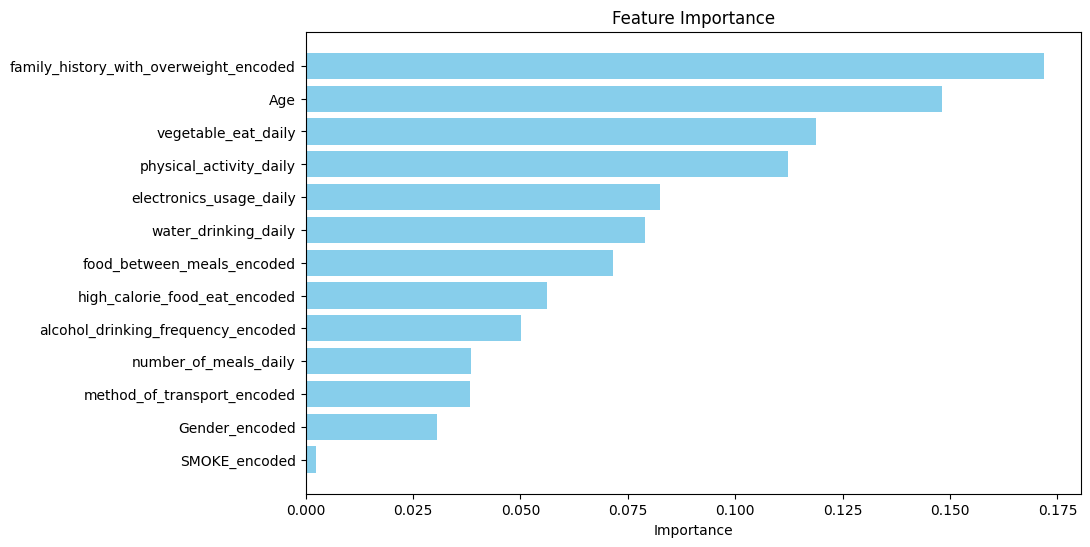

In [866]:
# Get feature importances
importances = model_dt.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

Decision tree identifies family history, age, vegetable eating habits, physical activity as the most important factors. This consistent with the logistic regression model 

### Random Forest Model

Confusion Matrix:
[[213  11]
 [ 14 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       224
           1       0.94      0.93      0.94       194

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

ROC AUC: 0.9394


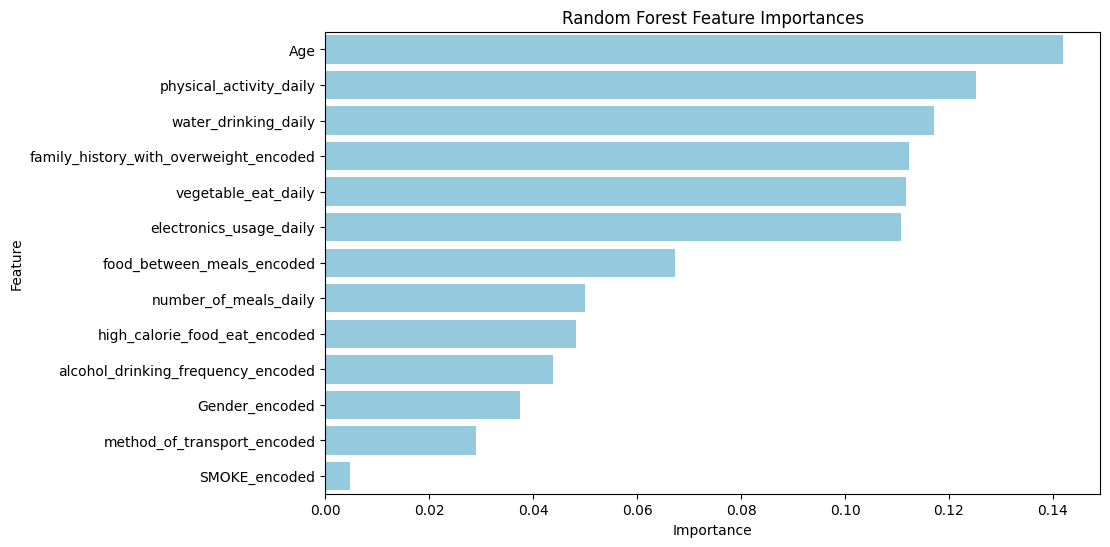

In [873]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.4f}")

# Feature importance analysis
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The ROC AUC score of 0.9394 is significantly higher than both Logistic Regression (0.7821) and Decision Tree (0.8446), suggesting that the Random Forest model has an excellent ability to distinguish between the two classes. Given these metrics, the Random Forest model is the most effective among the three models (Logistic Regression, Decision Tree, and Random Forest) for predicting obesity status. 

Intrestingly random forest gives feature importance to age, physical activity, water drinking and family history. It is interesting the vegetable eating is less important than other models. 

Future analysis:
- Need to consider why high vegetable contributes to obesity status - is there an interaction with another variable, example: calories consumed? Could do a diet score instead of vegetable eaten daily to consider the effect of balanced diets
- Syntheic data: Consider cross validation techniques
